In [2]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
import csv
import cv2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Download Dataset
Run the codes of this section only one time, it will downlad and store the dataset in your drive

### Mount your drive
First, mount your drive on this notebook. After running the next cell, you can see your google drive directory in Files, the left side of this page.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Download cars images

In [ ]:
!wget http://imagenet.stanford.edu/internal/car196/car_ims.tgz

--2021-01-01 10:13:17--  http://imagenet.stanford.edu/internal/car196/car_ims.tgz
Resolving imagenet.stanford.edu (imagenet.stanford.edu)... 171.64.68.16
Connecting to imagenet.stanford.edu (imagenet.stanford.edu)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1956628579 (1.8G) [application/x-gzip]
Saving to: ‘car_ims.tgz.1’

car_ims.tgz.1         0%[                    ]   2.09M  1.02MB/s               ^C


### Download annotations

In [ ]:
!gdown --id 1XJnWLShjrr47WI_yPCyKBGEWsAKjfnjS
!gdown --id 19mQADQyu9z8hCdsgbIBn6naTv4uXyc0O
!gdown --id 1mrFRxNcu_nZuTeWrSTaeBMblg9ZBWsQw

Downloading...
From: https://drive.google.com/uc?id=1XJnWLShjrr47WI_yPCyKBGEWsAKjfnjS
To: /content/annot_test.csv
100% 298k/298k [00:00<00:00, 43.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=19mQADQyu9z8hCdsgbIBn6naTv4uXyc0O
To: /content/annot_train.csv
100% 302k/302k [00:00<00:00, 93.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mrFRxNcu_nZuTeWrSTaeBMblg9ZBWsQw
To: /content/class_names.csv
100% 5.45k/5.45k [00:00<00:00, 9.35MB/s]


### Move to drive

In [ ]:
!mkdir -p "/content/drive/My Drive/Datasets/Cars/"
!mv "/content/car_ims.tgz" "/content/drive/My Drive/Datasets/Cars"
!mv "/content/annot_train.csv" "/content/drive/My Drive/Datasets/Cars"
!mv "/content/annot_test.csv" "/content/drive/My Drive/Datasets/Cars"
!mv "/content/class_names.csv" "/content/drive/My Drive/Datasets/Cars"

# Load Dataset

In [3]:
!tar -xzf "/content/drive/My Drive/Datasets/Cars/car_ims.tgz"

In [ ]:
!cp "/content/drive/My Drive/Datasets/Cars/annot_train.csv" "/content/"
!cp "/content/drive/My Drive/Datasets/Cars/annot_test.csv" "/content/"
!cp "/content/drive/My Drive/Datasets/Cars/class_names.csv" "/content/"

In [4]:
# 
with open("/content/drive/My Drive/Datasets/Cars/annot_train.csv", 'r') as my_file:
    reader = csv.reader(my_file, delimiter='\t')
    train_list = list(reader)[1:]
    print(train_list)

# 
with open("/content/drive/My Drive/Datasets/Cars/annot_test.csv", 'r') as my_file:
    reader = csv.reader(my_file, delimiter='\t')
    test_list = list(reader)[1:]
    print(test_list)

# 
with open("/content/drive/My Drive/Datasets/Cars/class_names.csv", 'r') as my_file:
    reader = csv.reader(my_file, delimiter=',')
    class_names = list(reader)[0]
    print(class_names)

[['car_ims/000001.jpg,112,7,853,717,1'], ['car_ims/000002.jpg,48,24,441,202,1'], ['car_ims/000003.jpg,7,4,277,180,1'], ['car_ims/000004.jpg,33,50,197,150,1'], ['car_ims/000005.jpg,5,8,83,58,1'], ['car_ims/000006.jpg,10,6,250,110,1'], ['car_ims/000007.jpg,56,1,394,176,1'], ['car_ims/000008.jpg,1,13,113,83,1'], ['car_ims/000009.jpg,15,111,271,272,1'], ['car_ims/000010.jpg,14,18,148,107,1'], ['car_ims/000011.jpg,5,8,91,59,1'], ['car_ims/000012.jpg,29,18,157,86,1'], ['car_ims/000013.jpg,1,1,300,179,1'], ['car_ims/000014.jpg,9,1,152,103,1'], ['car_ims/000015.jpg,4,15,94,63,1'], ['car_ims/000016.jpg,12,16,117,71,1'], ['car_ims/000017.jpg,1,5,160,89,1'], ['car_ims/000018.jpg,46,84,661,428,1'], ['car_ims/000019.jpg,86,81,371,252,1'], ['car_ims/000020.jpg,26,32,677,418,1'], ['car_ims/000021.jpg,50,127,587,396,1'], ['car_ims/000022.jpg,6,9,124,89,1'], ['car_ims/000023.jpg,52,25,751,507,1'], ['car_ims/000024.jpg,3,23,132,98,1'], ['car_ims/000025.jpg,60,76,593,393,1'], ['car_ims/000026.jpg,21,18,4

### Show some samples

['car_ims/000419.jpg', '89', '68', '483', '310', '6']
['car_ims/010620.jpg', '3', '25', '295', '214', '129']
['car_ims/005543.jpg', '86', '158', '537', '401', '69']
['car_ims/014127.jpg', '35', '105', '595', '411', '172']
['car_ims/009059.jpg', '12', '60', '396', '312', '111']


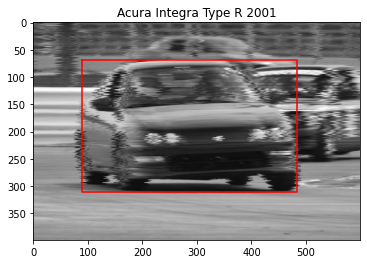

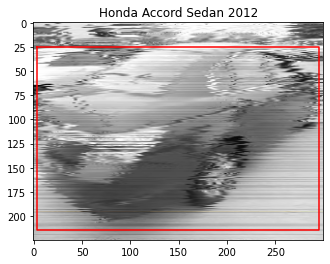

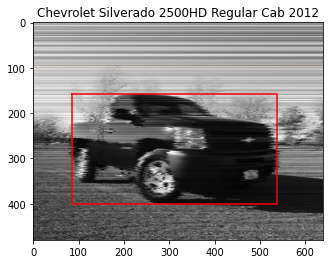

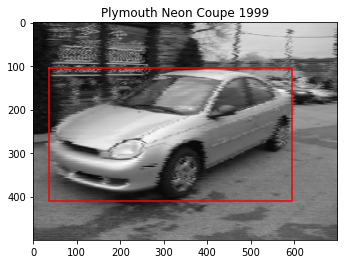

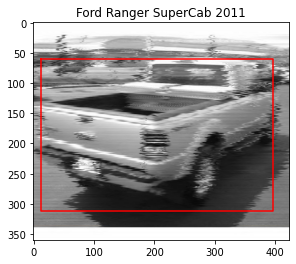

In [ ]:
seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
])

for i in np.random.randint(0, len(train_list), 5):

    line = train_list[i][0].split(',')
    print(line)
    class_id = int(line[5]) - 1
    image = cv2.imread('/content/' + line[0])
    images_aug = seq(images=image)

    plt.figure()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.imshow(cv2.cvtColor(images_aug, cv2.COLOR_BGR2RGB))
    plt.title(class_names[class_id])
    
    x1 = int(line[1])
    y1 = int(line[2])
    x2 = int(line[3])
    y2 = int(line[4])
    plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')


# قسمت الف

In [ ]:
import numpy as np
import keras

class DataGenerator(keras.utils.Sequence):

    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(32,32,32), n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()
        self.batchNum = 0

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data

        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] = cv2.resize(cv2.imread('/content/' + ID ),(224,224))


            # Store class
            y[i] = self.labels[self.list_IDs.index(ID)]
        
        self.batchNum += 1
  
        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)

# قسمت ب

In [ ]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, Dropout
# Parameters
params = {'dim': (224,224),
          'batch_size': 64,
          'n_classes': 196,
          'n_channels': 3,
          'shuffle': True}

# Datasets
trainAdd = []
trainLabels = []

testAdd = []
testLabels = []

for i in range(0, len(train_list)):
    line = train_list[i][0].split(',')

    class_id = int(line[5]) - 1
    imageAdd = line[0]
    trainAdd.append(imageAdd)
    trainLabels.append(class_id)

for i in range(0, len(test_list)):
    line = test_list[i][0].split(',')

    class_id = int(line[5]) - 1
    imageAdd = line[0]
    testAdd.append(imageAdd)
    testLabels.append(class_id)
    



# Generators
training_generator = DataGenerator(trainAdd, trainLabels, **params)
validation_generator = DataGenerator(testAdd, testLabels, **params)



# model = Sequential()
# model.add(Conv2D(32, (3,3),padding='same',input_shape=(224,224,3),name='conv2d'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2),name='maxpool2d_1'))
# model.add(Conv2D(32, (3, 3),name='conv2d_2'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2),name='maxpool2d_2'))
# model.add(Dropout(0.5))
# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(196))
# model.add(Activation('softmax'))
# model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])
# model.fit_generator(
#         training_generator,
#         validation_data=validation_generator,
#         )



model = keras.applications.ResNet50(input_shape=(224, 224, 3), classes=196, weights=None)
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model on dataset
model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    epochs=30,
                    shuffle=True
                   )

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_14[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
127/127 [==============================] - 164s 1s/step - loss: 6.1911 - accuracy: 0.0057 - val_loss: 5.3087 - val_accuracy: 0.0061
Epoch 2/30
127/127 [==============================] - 159s 1s/step - loss: 5.3128 - accuracy: 0.0114 - val_loss: 5.2657 - val_accuracy: 0.0108
Epoch 3/30
127/127 [==============================] - 159s 1s/step - loss: 5.1720 - accuracy: 0.0121 - val_loss: 6.3020 - val_accuracy: 0.0110
Epoch 4/30
127/127 [==============================] - 159s 1s/step - loss: 5.0603 - accuracy: 0.0259 - val_loss: 5.3629 - val_accuracy: 0.0178
Epoch 5/30
127/127 [==============================] - 159s 1s/step - loss: 4.9681 - accuracy: 0.0269 - val_loss: 5.9896 - val_accuracy: 0.0225
Epoch 6/30
127/127 [==============================] - 158s 1s/step - loss: 4.8041 - accuracy: 0.0417 - val_loss: 6.3347 - val_accuracy: 0.0129
Epoch 7/30
127/127 [==============================] - 159s 1s/step - loss: 4.6684 - accuracy: 0.0473 - val_loss: 6.6032 - val_accuracy: 0.0166

# قسمت پ

In [ ]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, Dropout
# Parameters
params = {'dim': (224,224),
          'batch_size': 64,
          'n_classes': 196,
          'n_channels': 3,
          'shuffle': True}

# Datasets
trainAdd = []
trainLabels = []

testAdd = []
testLabels = []

for i in range(0, len(train_list)):
    line = train_list[i][0].split(',')

    class_id = int(line[5]) - 1
    imageAdd = line[0]
    trainAdd.append(imageAdd)
    trainLabels.append(class_id)

for i in range(0, len(test_list)):
    line = test_list[i][0].split(',')

    class_id = int(line[5]) - 1
    imageAdd = line[0]
    testAdd.append(imageAdd)
    testLabels.append(class_id)
    



# Generators
training_generator = DataGenerator(trainAdd, trainLabels, **params)
validation_generator = DataGenerator(testAdd, testLabels, **params)


model = keras.applications.ResNet50(input_shape=(224, 224, 3), classes=196, weights='imagenet', include_top=False)
x = keras.layers.GlobalAvgPool2D()(model.output)
x = keras.layers.Dense(units=196, activation='softmax')(x)
model = keras.models.Model(model.input, x)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model on dataset
model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    epochs=35,
                    shuffle=True
                   )

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/35
127/127 [==============================] - 189s 1s/step - loss: 5.1565 - accuracy: 0.0395 - val_loss: 27.0286 - val_accuracy: 0.0074
Epoch 2/35
127/127 [==============================] - 187s 1s/step - loss: 2.9534 - accuracy: 0.2719 - val_loss: 4.4836 - val_accuracy: 0.1020
Epoch 3/35
127/127 [==============================] - 186s 1s/step - loss: 1.5601 - accuracy: 0.5775 - val_loss: 3.5671 - val_accuracy: 0.2219
Epoch 4/35
127/127 [==============================] - 184s 1s/step - loss: 0.7635 - accuracy: 0.7806 - val_loss: 4.3921 - val_accuracy: 0.2231
Epoch 5/35
127/127 [==============================] - 184s 1s/step - loss: 0.3897 - accuracy: 0.8915 - val_loss: 3.1301 - val_accuracy: 0.3260
Epoch 6/35
127/127 [==============================] - 183s 1s/step - loss: 0.2421 - accuracy: 0.9330 - val_loss: 2.6853 - val_accuracy: 0.4264
Epoch 7/35
127/127 [==============================] - 183s 1s/step - loss: 0.1427 - accuracy: 0.9661 - val_loss: 2.9213 - val_accuracy: 0.387

# قسمت ت

In [ ]:
from imgaug import augmenters as iaa
import numpy as np
import keras


class DataGeneratorWithAug(keras.utils.Sequence):

    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(32,32,32), n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()
        self.batchNum = 0

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):

        seq1 = iaa.Sequential([
            iaa.Fliplr(0.5), # horizontal flips
            iaa.Crop(percent=(0, 0.1)), # random crops
            # Small gaussian blur with random sigma between 0 and 0.5.
            # But we only blur about 50% of all images.
            iaa.Sometimes(
                0.5,
                iaa.GaussianBlur(sigma=(0, 0.5))
            ),
            # Strengthen or weaken the contrast in each image.
            iaa.LinearContrast((0.75, 1.5)),
            # Add gaussian noise.
            # For 50% of all images, we sample the noise once per pixel.
            # For the other 50% of all images, we sample the noise per pixel AND
            # channel. This can change the color (not only brightness) of the
            # pixels.
            iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
            # Make some images brighter and some darker.
            # In 20% of all cases, we sample the multiplier once per channel,
            # which can end up changing the color of the images.
            iaa.Multiply((0.8, 1.2), per_channel=0.2),
            # Apply affine transformations to each image.
            # Scale/zoom them, translate/move them, rotate them and shear them.
            iaa.Affine(
                scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
                translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
                rotate=(-25, 25),
                shear=(-8, 8)
            )
        ], random_order=True) 

        seq2 = iaa.Sequential([
            iaa.Fliplr(0.5), # horizontal flips
            iaa.Crop(percent=(0, 0.1)), # random crops
            # Small gaussian blur with random sigma between 0 and 0.5.
            # But we only blur about 50% of all images.
            iaa.Sometimes(
                0.5,
                iaa.GaussianBlur(sigma=(0, 0.5))
            ),
            # Strengthen or weaken the contrast in each image.
            iaa.LinearContrast((0.75, 1.5)),
            # Add gaussian noise.
            # For 50% of all images, we sample the noise once per pixel.
            # For the other 50% of all images, we sample the noise per pixel AND
            # channel. This can change the color (not only brightness) of the
            # pixels.
            iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
            # Make some images brighter and some darker.
            # In 20% of all cases, we sample the multiplier once per channel,
            # which can end up changing the color of the images.
            iaa.Multiply((0.8, 1.2), per_channel=0.2),
            # Apply affine transformations to each image.
            # Scale/zoom them, translate/move them, rotate them and shear them.
            iaa.Affine(
                scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
                translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
                rotate=(-25, 25),
                shear=(-8, 8)
            )
        ], random_order=True) 


        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

       

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        augX1 = seq1(images=X) 
        augX2 = seq2(images=X) 

        X = np.concatenate([X , augX1, augX2 ])
        y = np.concatenate([y , y, y])

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization



        X = np.empty((self.batch_size, *self.dim, self.n_channels),dtype=np.uint8)
        y = np.empty((self.batch_size), dtype=int)



        # Generate data

        for i, ID in enumerate(list_IDs_temp):
            # Store sample

            X[i,] = cv2.resize(cv2.imread('/content/' + ID ),(224,224))


            # Store class
            y[i] = self.labels[self.list_IDs.index(ID)]
        
        self.batchNum += 1
  
        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)


params = {'dim': (224,224),
          'batch_size': 16,
          'n_classes': 196,
          'n_channels': 3,
          'shuffle': True}

# Datasets
trainAdd = []
trainLabels = []

testAdd = []
testLabels = []

for i in range(0, len(train_list)):
    line = train_list[i][0].split(',')

    class_id = int(line[5]) - 1
    imageAdd = line[0]
    trainAdd.append(imageAdd)
    trainLabels.append(class_id)

for i in range(0, len(test_list)):
    line = test_list[i][0].split(',')

    class_id = int(line[5]) - 1
    imageAdd = line[0]
    testAdd.append(imageAdd)
    testLabels.append(class_id)
    



# Generators
training_generator = DataGeneratorWithAug(trainAdd, trainLabels, **params)
validation_generator = DataGenerator(testAdd, testLabels, **params)



model = keras.applications.ResNet50(input_shape=(224, 224, 3), classes=196, weights='imagenet', include_top=False)
x = keras.layers.GlobalAvgPool2D()(model.output)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(units=196, activation='softmax')(x)
model = keras.models.Model(model.input, x)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model on dataset
model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    epochs=35,
                    shuffle=True
     
                   )


Model: "model_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_28[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/35
509/509 [==============================] - 347s 671ms/step - loss: 5.4057 - accuracy: 0.0063 - val_loss: 5.8302 - val_accuracy: 0.0105
Epoch 2/35
509/509 [==============================] - 338s 664ms/step - loss: 5.2028 - accuracy: 0.0114 - val_loss: 6.0884 - val_accuracy: 0.0049
Epoch 3/35
509/509 [==============================] - 338s 663ms/step - loss: 5.0958 - accuracy: 0.0175 - val_loss: 5.1568 - val_accuracy: 0.0169
Epoch 4/35
509/509 [==============================] - 337s 661ms/step - loss: 4.8637 - accuracy: 0.0222 - val_loss: 5.6515 - val_accuracy: 0.0176
Epoch 5/35
509/509 [==============================] - 335s 657ms/step - loss: 4.5795 - accuracy: 0.0373 - val_loss: 4.5373 - val_accuracy: 0.0467
Epoch 6/35
509/509 [==============================] - 337s 661ms/step - loss: 4.3262 - accuracy: 0.0567 - val_loss: 4.3330 - val_accuracy: 0.0650
Epoch 7/35
509/509 [==============================] - 335s 659ms/step - loss: 3.9580 - accuracy: 0.0924 - val_loss: 3.9752 -

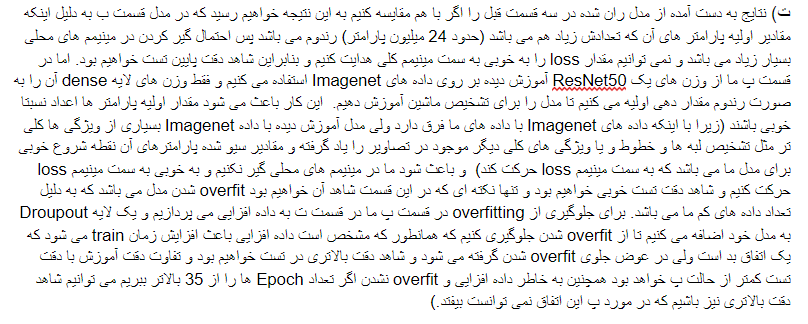

# قسمت ث

In [9]:
from imgaug import augmenters as iaa
import imgaug as ia
import numpy as np
import keras
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

class DataGenerator(keras.utils.Sequence):

    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(32,32,32), n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()
        self.batchNum = 0

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))


    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y


    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization


        X = np.empty((self.batch_size, *self.dim, self.n_channels),dtype=np.uint8)
        y_1 = np.empty((self.batch_size), dtype=int)
        y_2 = np.empty((self.batch_size,4), dtype=int)


        # Generate data

        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            image = cv2.imread('/content/' + ID )
            img_height_scale = 224 /image.shape[0]
            img_width_scale = 224 / image.shape[1]

            X[i,] = cv2.resize(cv2.imread('/content/' + ID ),(224,224))



            # Store class
            y_1[i] = self.labels[self.list_IDs.index(ID)][0]
            x1, y1, x2, y2 = self.labels[self.list_IDs.index(ID)][1:5]

            # print("aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa")
            # print(self.labels[self.list_IDs.index(ID)][1:5])

            # print("ccccccccccccccccccccccccccccc")
            # print(int(x1 * img_width_scale))

            y_2[i] =  [int(x1 * img_width_scale), int(y1 * img_height_scale), int(x2 * img_width_scale), int(y2 * img_height_scale)]
            # print("bbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb")
            # print( y_2[i])
            # plt.figure()
            # plt.imshow(cv2.cvtColor(X[0], cv2.COLOR_BGR2RGB))

            # x1 = int(y_2[0][0])
            # y1 = int(y_2[0][1])
            # x2 = int(y_2[0][2])
            # y2 = int(y_2[0][3])
            # plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')
        
        self.batchNum += 1

        # print({'regression': y_2,'classification': keras.utils.to_categorical(y_1, num_classes=self.n_classes)})

        return X, {'regression': y_2,'classification': keras.utils.to_categorical(y_1, num_classes=self.n_classes)}


class DataGeneratorAug(keras.utils.Sequence):

    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(32,32,32), n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()
        self.batchNum = 0

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))


    def __getitem__(self, index):

        seq1 = iaa.Sequential([
            iaa.Fliplr(0.5), # horizontal flips
            iaa.Crop(percent=(0, 0.1)), # random crops
            # Small gaussian blur with random sigma between 0 and 0.5.
            # But we only blur about 50% of all images.
            iaa.Sometimes(
                0.5,
                iaa.GaussianBlur(sigma=(0, 0.5))
            ),
            # Strengthen or weaken the contrast in each image.
            iaa.LinearContrast((0.75, 1.5)),
            # Add gaussian noise.
            # For 50% of all images, we sample the noise once per pixel.
            # For the other 50% of all images, we sample the noise per pixel AND
            # channel. This can change the color (not only brightness) of the
            # pixels.
            iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
            # Make some images brighter and some darker.
            # In 20% of all cases, we sample the multiplier once per channel,
            # which can end up changing the color of the images.
            iaa.Multiply((0.8, 1.2), per_channel=0.2),
            # Apply affine transformations to each image.
            # Scale/zoom them, translate/move them, rotate them and shear them.
            iaa.Affine(
                scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
                translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
                rotate=(-25, 25),
                shear=(-8, 8)
            )
        ], random_order=True) 



        seq2 = iaa.Sequential([
            iaa.Fliplr(0.5), # horizontal flips
            iaa.Crop(percent=(0, 0.1)), # random crops
            # Small gaussian blur with random sigma between 0 and 0.5.
            # But we only blur about 50% of all images.
            iaa.Sometimes(
                0.5,
                iaa.GaussianBlur(sigma=(0, 0.5))
            ),
            # Strengthen or weaken the contrast in each image.
            iaa.LinearContrast((0.75, 1.5)),
            # Add gaussian noise.
            # For 50% of all images, we sample the noise once per pixel.
            # For the other 50% of all images, we sample the noise per pixel AND
            # channel. This can change the color (not only brightness) of the
            # pixels.
            iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
            # Make some images brighter and some darker.
            # In 20% of all cases, we sample the multiplier once per channel,
            # which can end up changing the color of the images.
            iaa.Multiply((0.8, 1.2), per_channel=0.2),
            # Apply affine transformations to each image.
            # Scale/zoom them, translate/move them, rotate them and shear them.
            iaa.Affine(
                scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
                translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
                rotate=(-25, 25),
                shear=(-8, 8)
            )
        ], random_order=True)


        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

       

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        bbs = []
        for box in y['regression']:
          bbs.append( BoundingBoxesOnImage([BoundingBox(box[0], box[1], box[2], box[3])], shape=(224,224)))

        (augX,augY) = seq1(images=X,bounding_boxes=bbs) 
        (augX2,augY2) = seq2(images=X,bounding_boxes=bbs) 

        NewY = []
        NewY2 = []
        # print(augY)
        for i in range(len(augY)):
          BOX = augY[i].bounding_boxes[0]
          BOX2 = augY2[i].bounding_boxes[0]
          # print(BOX)
          NewY.append([BOX.x1,BOX.y1,BOX.x2,BOX.y2])
          NewY2.append([BOX2.x1,BOX2.y1,BOX2.x2,BOX2.y2])

      

        X = np.concatenate([X , np.array(augX) , np.array(augX2) ])



        y =  {'regression': np.concatenate([y['regression'],NewY,NewY2]) ,'classification': np.concatenate([y['classification'],y['classification'],y['classification']])}

        

        # plt.imshow(cv2.cvtColor(X[0], cv2.COLOR_BGR2RGB))
        # plt.show()

        # plt.imshow(cv2.cvtColor(X[33], cv2.COLOR_BGR2RGB))
        # plt.show()
        
        # ia.imshow(BoundingBox(y['regression'][33][0],y['regression'][33][1],y['regression'][33][2],y['regression'][33][3]).draw_on_image(X[33], size=2))

        # plt.figure()
        # plt.imshow(cv2.cvtColor(X[33], cv2.COLOR_BGR2RGB))

        # x1 = int(y['regression'][33][0])
        # y1 = int(y['regression'][33][1])
        # x2 = int(y['regression'][33][2])
        # y2 = int(y['regression'][33][3])
        # plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1])



        # plt.figure()
        # plt.imshow(cv2.cvtColor(X[1], cv2.COLOR_BGR2RGB))

        # x1 = int(y['regression'][1][0])
        # y1 = int(y['regression'][1][1])
        # x2 = int(y['regression'][1][2])
        # y2 = int(y['regression'][1][3])
        # plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1])


        # plt.show()



        # image = cv2.imread('/content/' + test_list[0][0].split(",")[0])
        # print( test_list[0][0].split(",")[0])
        # plt.figure()
        # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # plt.title(class_names[class_id])

        # x1 = int( test_list[0][0].split(",")[1])
        # y1 = int( test_list[0][0].split(",")[2])
        # x2 = int( test_list[0][0].split(",")[3])
        # y2 = int( test_list[0][0].split(",")[4])
        # plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')



        return X, y


    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization


        X = np.empty((self.batch_size, *self.dim, self.n_channels),dtype=np.uint8)
        y_1 = np.empty((self.batch_size), dtype=int)
        y_2 = np.empty((self.batch_size,4), dtype=int)


        # Generate data

        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            image = cv2.imread('/content/' + ID )
            img_height_scale = 224 /image.shape[0]
            img_width_scale = 224 / image.shape[1]

            X[i,] = cv2.resize(cv2.imread('/content/' + ID ),(224,224))



            # Store class
            y_1[i] = self.labels[self.list_IDs.index(ID)][0]
            x1, y1, x2, y2 = self.labels[self.list_IDs.index(ID)][1:5]

            # print("aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa")
            # print(self.labels[self.list_IDs.index(ID)][1:5])

            # print("ccccccccccccccccccccccccccccc")
            # print(int(x1 * img_width_scale))

            y_2[i] =  [int(x1 * img_width_scale), int(y1 * img_height_scale), int(x2 * img_width_scale), int(y2 * img_height_scale)]
            # print("bbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbb")
            # print( y_2[i])
            # plt.figure()
            # plt.imshow(cv2.cvtColor(X[0], cv2.COLOR_BGR2RGB))

            # x1 = int(y_2[0][0])
            # y1 = int(y_2[0][1])
            # x2 = int(y_2[0][2])
            # y2 = int(y_2[0][3])
            # plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')
        
        self.batchNum += 1

        # print({'regression': y_2,'classification': keras.utils.to_categorical(y_1, num_classes=self.n_classes)})

        return X, {'regression': y_2,'classification': keras.utils.to_categorical(y_1, num_classes=self.n_classes)}


# قسمت ج

In [10]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, Dropout


params = {'dim': (224,224),
          'batch_size': 32,
          'n_classes': 196,
          'n_channels': 3,
          'shuffle': True}

# Datasets
trainAdd = []
trainLabels = []

testAdd = []
testLabels = []

for i in range(0, len(train_list)):
    line = train_list[i][0].split(',')

    class_id = int(line[5]) - 1
    imageAdd = line[0]
    x1 = int(line[1])
    y1 = int(line[2])
    x2 = int(line[3])
    y2 = int(line[4])
    trainAdd.append(imageAdd)
    trainLabels.append([class_id,x1,y1,x2,y2])

for i in range(0, len(test_list)):
    line = test_list[i][0].split(',')

    class_id = int(line[5]) - 1
    imageAdd = line[0]
    x1 = int(line[1])
    y1 = int(line[2])
    x2 = int(line[3])
    y2 = int(line[4])
    testAdd.append(imageAdd)
    testLabels.append([class_id,x1,y1,x2,y2])
    

# Generators
training_generator = DataGeneratorAug(trainAdd, trainLabels, **params)
validation_generator = DataGenerator(testAdd, testLabels, **params)


model = keras.applications.ResNet50(input_shape=(224, 224, 3), classes=196, weights='imagenet', include_top=False)
x = keras.layers.GlobalAvgPool2D()(model.output)
x = keras.layers.Dropout(0.2)(x)
output1 = Dense(4, name='regression')(x)
output2 = Dense(196, activation='softmax', name='classification')(x)

model = keras.models.Model(inputs=model.input, outputs=[output1, output2])

model.summary()


losses = {
	"classification": "categorical_crossentropy",
  "regression": "mse"
}
lossWeights = {"classification": 1.0, "regression": 0.0001}
# initialize the optimizer and compile the model
print("[INFO] compiling model...")

model.compile(optimizer='adam', loss=losses, loss_weights=lossWeights,metrics=["accuracy","mae"])

# Train model on dataset
# H = model.fit(x=trainX,
# 	y={"category_output": trainCategoryY, "color_output": trainColorY},
# 	validation_data=(testX,
# 		{"category_output": testCategoryY, "color_output": testColorY}),
# 	epochs=EPOCHS,
# 	verbose=1)

model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    epochs=35,
                    shuffle=True
                   )


model.save(
    '/content/drive/My Drive/ImageHW8savemodel4.h5'
)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/35
254/254 [==============================] - 448s 2s/step - loss: 7.6844 - regression_loss: 22212.2152 - classification_loss: 5.4632 - regression_accuracy: 0.4223 - regression_mae: 117.6754 - classification_accuracy: 0.0113 - classification_mae: 0.0101 - val_loss: 5.6247 - val_regression_loss: 6990.3813 - val_classification_loss: 4.9257 - val_regression_accuracy: 0.5906 - val_regression_mae: 67.1767 - val_classification_accuracy: 0.0330 - val_classification_mae: 0.0100
Epoch 2/35
254/254 [==============================] - 440s 2s/step - loss: 5.1276 - regression_loss: 3419.3874 - classification_loss: 4.7857 - regression_accuracy: 0.6066 - regression_mae: 46.2051 - classification_accuracy: 0.0473 - classification_mae: 0.0100 - val_loss: 7.5936 - val_regression_loss: 1348.6799 - val_classification_loss: 7.4587 - val_regression_accuracy: 0.7358 - val_regression_mae: 26.4504 - val_classification_accuracy: 0.0327 - val_classification_mae: 0.0099
Epoch 3/35
254/254 [================

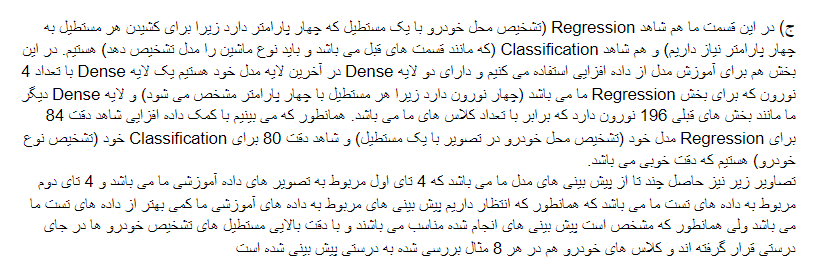

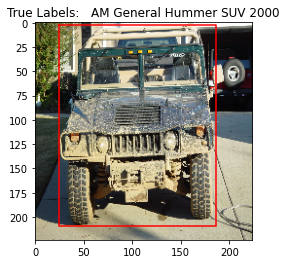

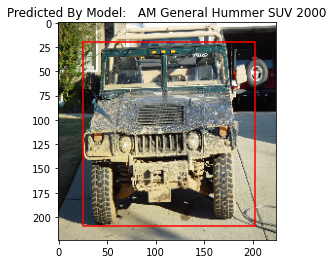

In [60]:
trainImageRealSize = cv2.imread('/content/' + train_list[0][0].split(",")[0])
trainImage1 = cv2.resize(cv2.imread('/content/' + train_list[0][0].split(",")[0]),(224,224))

trainExample =  train_list[0][0]

img_height_scale = 224 /trainImageRealSize.shape[0]
img_width_scale = 224 / trainImageRealSize.shape[1]

trainPredict1 = model.predict(np.array([cv2.resize(trainImage1,(224,224))]))


class_id = int(trainExample.split(",")[5])-1
plt.figure()
plt.imshow(cv2.cvtColor(trainImage1, cv2.COLOR_BGR2RGB))

plt.title("True Labels:   " + class_names[class_id])

x1 = int(int( trainExample.split(",")[1])*img_width_scale)
y1 = int(int( trainExample.split(",")[2])*img_height_scale)
x2 = int(int( trainExample.split(",")[3])*img_width_scale)
y2 = int(int(trainExample.split(",")[4])*img_height_scale)
plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')


plt.figure()
plt.imshow(cv2.cvtColor(trainImage1, cv2.COLOR_BGR2RGB))

plt.title("Predicted By Model:   " + class_names[np.argmax(trainPredict1[1][0])])

x1 = int( trainPredict1[0][0][0])
y1 = int( trainPredict1[0][0][1])
x2 = int( trainPredict1[0][0][2])
y2 = int(trainPredict1[0][0][3])
plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')



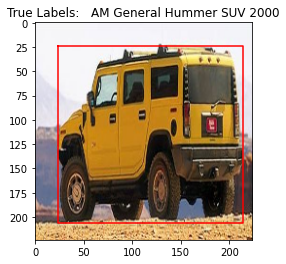

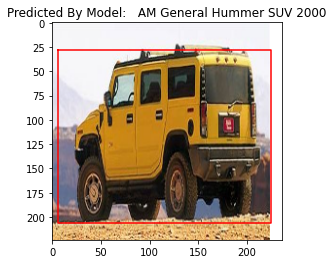

In [59]:
trainImageRealSize = cv2.imread('/content/' + train_list[1][0].split(",")[0])
trainImage1 = cv2.resize(cv2.imread('/content/' + train_list[1][0].split(",")[0]),(224,224))

trainExample =  train_list[1][0]

img_height_scale = 224 /trainImageRealSize.shape[0]
img_width_scale = 224 / trainImageRealSize.shape[1]

trainPredict1 = model.predict(np.array([cv2.resize(trainImage1,(224,224))]))


class_id = int(trainExample.split(",")[5])-1
plt.figure()
plt.imshow(cv2.cvtColor(trainImage1, cv2.COLOR_BGR2RGB))

plt.title("True Labels:   " + class_names[class_id])

x1 = int(int( trainExample.split(",")[1])*img_width_scale)
y1 = int(int( trainExample.split(",")[2])*img_height_scale)
x2 = int(int( trainExample.split(",")[3])*img_width_scale)
y2 = int(int(trainExample.split(",")[4])*img_height_scale)
plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')


plt.figure()
plt.imshow(cv2.cvtColor(trainImage1, cv2.COLOR_BGR2RGB))

plt.title("Predicted By Model:   " + class_names[np.argmax(trainPredict1[1][0])])

x1 = int( trainPredict1[0][0][0])
y1 = int( trainPredict1[0][0][1])
x2 = int( trainPredict1[0][0][2])
y2 = int(trainPredict1[0][0][3])
plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')

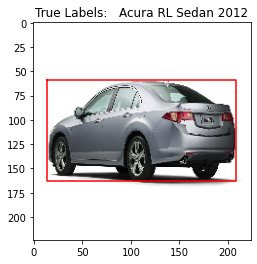

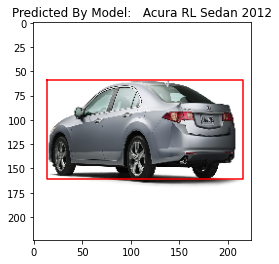

In [58]:
trainImageRealSize = cv2.imread('/content/' + train_list[50][0].split(",")[0])
trainImage1 = cv2.resize(cv2.imread('/content/' + train_list[50][0].split(",")[0]),(224,224))

trainExample =  train_list[50][0]

img_height_scale = 224 /trainImageRealSize.shape[0]
img_width_scale = 224 / trainImageRealSize.shape[1]

trainPredict1 = model.predict(np.array([cv2.resize(trainImage1,(224,224))]))


class_id = int(trainExample.split(",")[5])-1
plt.figure()
plt.imshow(cv2.cvtColor(trainImage1, cv2.COLOR_BGR2RGB))

plt.title("True Labels:   " + class_names[class_id])

x1 = int(int( trainExample.split(",")[1])*img_width_scale)
y1 = int(int( trainExample.split(",")[2])*img_height_scale)
x2 = int(int( trainExample.split(",")[3])*img_width_scale)
y2 = int(int(trainExample.split(",")[4])*img_height_scale)
plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')


plt.figure()
plt.imshow(cv2.cvtColor(trainImage1, cv2.COLOR_BGR2RGB))

plt.title("Predicted By Model:   " + class_names[np.argmax(trainPredict1[1][0])])

x1 = int( trainPredict1[0][0][0])
y1 = int( trainPredict1[0][0][1])
x2 = int( trainPredict1[0][0][2])
y2 = int(trainPredict1[0][0][3])
plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')

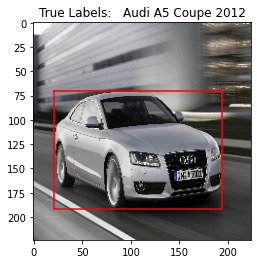

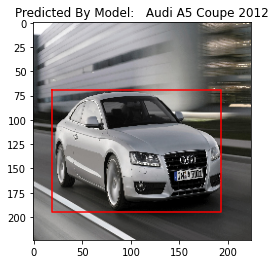

In [61]:

trainImageRealSize = cv2.imread('/content/' + train_list[500][0].split(",")[0])
trainImage1 = cv2.resize(cv2.imread('/content/' + train_list[500][0].split(",")[0]),(224,224))

trainExample =  train_list[500][0]

img_height_scale = 224 /trainImageRealSize.shape[0]
img_width_scale = 224 / trainImageRealSize.shape[1]

trainPredict1 = model.predict(np.array([cv2.resize(trainImage1,(224,224))]))


class_id = int(trainExample.split(",")[5])-1
plt.figure()
plt.imshow(cv2.cvtColor(trainImage1, cv2.COLOR_BGR2RGB))

plt.title("True Labels:   " + class_names[class_id])

x1 = int(int( trainExample.split(",")[1])*img_width_scale)
y1 = int(int( trainExample.split(",")[2])*img_height_scale)
x2 = int(int( trainExample.split(",")[3])*img_width_scale)
y2 = int(int(trainExample.split(",")[4])*img_height_scale)
plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')


plt.figure()
plt.imshow(cv2.cvtColor(trainImage1, cv2.COLOR_BGR2RGB))

plt.title("Predicted By Model:   " + class_names[np.argmax(trainPredict1[1][0])])

x1 = int( trainPredict1[0][0][0])
y1 = int( trainPredict1[0][0][1])
x2 = int( trainPredict1[0][0][2])
y2 = int(trainPredict1[0][0][3])
plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')

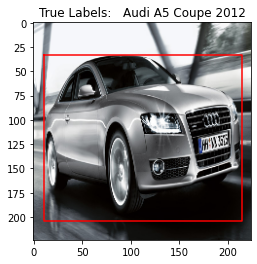

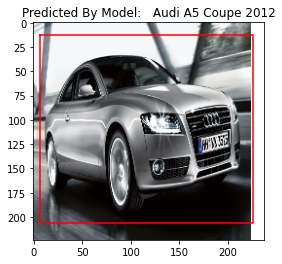

In [62]:
testImageRealSize = cv2.imread('/content/' + test_list[500][0].split(",")[0])
testImage1 = cv2.resize(cv2.imread('/content/' + test_list[500][0].split(",")[0]),(224,224))

testExample =  test_list[500][0]

img_height_scale = 224 /testImageRealSize.shape[0]
img_width_scale = 224 / testImageRealSize.shape[1]

testPredict1 = model.predict(np.array([cv2.resize(testImage1,(224,224))]))


class_id = int(testExample.split(",")[5])-1
plt.figure()
plt.imshow(cv2.cvtColor(testImage1, cv2.COLOR_BGR2RGB))

plt.title("True Labels:   " + class_names[class_id])

x1 = int(int( testExample.split(",")[1])*img_width_scale)
y1 = int(int( testExample.split(",")[2])*img_height_scale)
x2 = int(int( testExample.split(",")[3])*img_width_scale)
y2 = int(int(testExample.split(",")[4])*img_height_scale)
plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')


plt.figure()
plt.imshow(cv2.cvtColor(testImage1, cv2.COLOR_BGR2RGB))

plt.title("Predicted By Model:   " + class_names[np.argmax(testPredict1[1][0])])

x1 = int( testPredict1[0][0][0])
y1 = int( testPredict1[0][0][1])
x2 = int( testPredict1[0][0][2])
y2 = int(testPredict1[0][0][3])
plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')

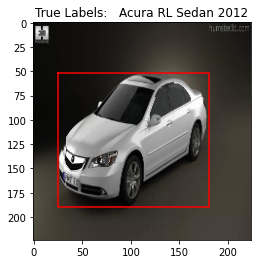

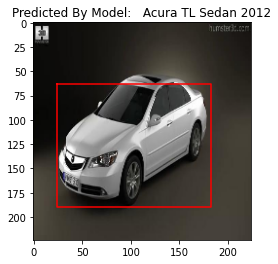

In [63]:
testImageRealSize = cv2.imread('/content/' + test_list[60][0].split(",")[0])
testImage1 = cv2.resize(cv2.imread('/content/' + test_list[60][0].split(",")[0]),(224,224))

testExample =  test_list[60][0]

img_height_scale = 224 /testImageRealSize.shape[0]
img_width_scale = 224 / testImageRealSize.shape[1]

testPredict1 = model.predict(np.array([cv2.resize(testImage1,(224,224))]))


class_id = int(testExample.split(",")[5])-1
plt.figure()
plt.imshow(cv2.cvtColor(testImage1, cv2.COLOR_BGR2RGB))

plt.title("True Labels:   " + class_names[class_id])

x1 = int(int( testExample.split(",")[1])*img_width_scale)
y1 = int(int( testExample.split(",")[2])*img_height_scale)
x2 = int(int( testExample.split(",")[3])*img_width_scale)
y2 = int(int(testExample.split(",")[4])*img_height_scale)
plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')


plt.figure()
plt.imshow(cv2.cvtColor(testImage1, cv2.COLOR_BGR2RGB))

plt.title("Predicted By Model:   " + class_names[np.argmax(testPredict1[1][0])])

x1 = int( testPredict1[0][0][0])
y1 = int( testPredict1[0][0][1])
x2 = int( testPredict1[0][0][2])
y2 = int(testPredict1[0][0][3])
plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')

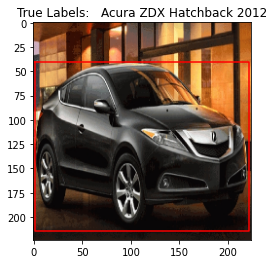

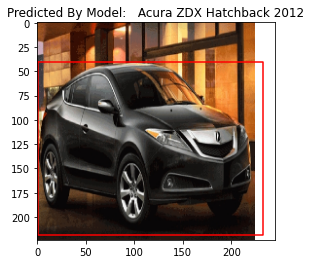

In [64]:
testImageRealSize = cv2.imread('/content/' + test_list[260][0].split(",")[0])
testImage1 = cv2.resize(cv2.imread('/content/' + test_list[260][0].split(",")[0]),(224,224))

testExample =  test_list[260][0]

img_height_scale = 224 /testImageRealSize.shape[0]
img_width_scale = 224 / testImageRealSize.shape[1]

testPredict1 = model.predict(np.array([cv2.resize(testImage1,(224,224))]))


class_id = int(testExample.split(",")[5])-1
plt.figure()
plt.imshow(cv2.cvtColor(testImage1, cv2.COLOR_BGR2RGB))

plt.title("True Labels:   " + class_names[class_id])

x1 = int(int( testExample.split(",")[1])*img_width_scale)
y1 = int(int( testExample.split(",")[2])*img_height_scale)
x2 = int(int( testExample.split(",")[3])*img_width_scale)
y2 = int(int(testExample.split(",")[4])*img_height_scale)
plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')


plt.figure()
plt.imshow(cv2.cvtColor(testImage1, cv2.COLOR_BGR2RGB))

plt.title("Predicted By Model:   " + class_names[np.argmax(testPredict1[1][0])])

x1 = int( testPredict1[0][0][0])
y1 = int( testPredict1[0][0][1])
x2 = int( testPredict1[0][0][2])
y2 = int(testPredict1[0][0][3])
plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')

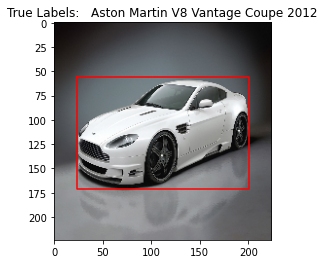

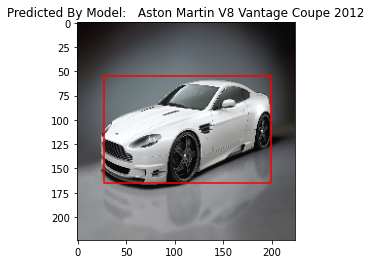

In [66]:
testImageRealSize = cv2.imread('/content/' + test_list[330][0].split(",")[0])
testImage1 = cv2.resize(cv2.imread('/content/' + test_list[330][0].split(",")[0]),(224,224))

testExample =  test_list[330][0]

img_height_scale = 224 /testImageRealSize.shape[0]
img_width_scale = 224 / testImageRealSize.shape[1]

testPredict1 = model.predict(np.array([cv2.resize(testImage1,(224,224))]))


class_id = int(testExample.split(",")[5])-1
plt.figure()
plt.imshow(cv2.cvtColor(testImage1, cv2.COLOR_BGR2RGB))

plt.title("True Labels:   " + class_names[class_id])

x1 = int(int( testExample.split(",")[1])*img_width_scale)
y1 = int(int( testExample.split(",")[2])*img_height_scale)
x2 = int(int( testExample.split(",")[3])*img_width_scale)
y2 = int(int(testExample.split(",")[4])*img_height_scale)
plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')


plt.figure()
plt.imshow(cv2.cvtColor(testImage1, cv2.COLOR_BGR2RGB))

plt.title("Predicted By Model:   " + class_names[np.argmax(testPredict1[1][0])])

x1 = int( testPredict1[0][0][0])
y1 = int( testPredict1[0][0][1])
x2 = int( testPredict1[0][0][2])
y2 = int(testPredict1[0][0][3])
plt.plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], 'r-')